In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from sympy import integrate, exp, sin, log, oo, pi,symbols
import deepxde as dde
import scipy.io as scio
from mpl_toolkits.mplot3d import Axes3D
from deepxde.backend import tf
#import datetime
# import time
import os
from pylab import mpl
from scipy.signal import chirp, spectrogram
mpl.rcParams['font.sans-serif']=['Microsoft YaHei']
mpl.rcParams['axes.unicode_minus']=False
from matplotlib.pyplot import MultipleLocator
# import xlrd
# import xlwt
from sympy import *
import sympy as sp
# import torch

2025-01-08 15:08:17.764360: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term


2025-01-08 15:08:18.491560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-08 15:08:18.495123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-01-08 15:08:18.495204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Enable just-in-time compilation with XLA.




In [2]:
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=2'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'
tf.function(jit_compile=True)

<function tensorflow.python.eager.def_function.function.<locals>.decorated(inner_function)>

In [3]:
def round_sf(x, significant_figure=3):
    fmt = "%%.%dg" % significant_figure
    if isinstance(x, np.ndarray):
        return np.array([float(fmt % i) for i in x])
    else:
        return float(fmt % x)

In [4]:
def Output_dNN(X, j = 0):
    import re
    lines = open("s1.dat", "r").readlines()
    S = np.array([np.fromstring(min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), line),\
                                key=len),sep=",",) for line in lines ])
    dis = S[:,0:num_dis+2][-1]
    dis[-1] = dis[-1]+0.001
    dis[0] = -0.2
    dis[-1] = 1.7
    x = X[:,0:1]
    Y = x
    index  = [ np.where((x>=dis[i])&(x<dis[i+1]))[0] for i in range(0,dis.shape[0]-1) ]
    interv = [ (x>=dis[i])&(x<dis[i+1]) for i in range(0,dis.shape[0]-1) ]
    Temp = model.predict(X[interv[0].ravel()], operator=lambda x,y:dde.grad.jacobian(y,x, i= num_NN*j,j=0))
    Y[index[0]] = Temp
    for i in range(1,num_NN):
        Temp = model.predict(X[interv[i].ravel()], operator=\
                                               lambda x,y:dde.grad.jacobian(y,x, i=num_NNj + i,j=0))
        Y[index[i]] = Temp
    if j == 0 or j == 4: #u,fai,dfai,M,V   fai_dNN,dfai_dNN,XXX,V_dNN,q_dNN
        Y = -Y
    return Y

In [5]:
def Output(X):
    Out_final = np.zeros((X.shape[0],7))
    import re
    lines = open("s1.dat", "r").readlines()
    S = np.array([np.fromstring(min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), line),\
                                key=len),sep=",",) for line in lines ])
    dis = S[:,0:num_dis+2][-1]
    dis2 = np.array([-0.2,L/2+L_dis/2,1.7])
    dis[0] = -0.2
    dis[-1] = 1.7
    x = X[:,0:1]
    index  = [ np.where((x>=dis[i])&(x<dis[i+1]))[0] for i in range(0,dis.shape[0]-1) ]
    index2 = [ np.where((x>=dis2[i])&(x<dis2[i+1]))[0] for i in range(0,dis2.shape[0]-1) ]
    interv = [ (x>=dis[i])&(x<dis[i+1]) for i in range(0,dis.shape[0]-1) ]
    interv2 = [ (x>=dis2[i])&(x<dis2[i+1]) for i in range(0,dis2.shape[0]-1) ]
    out_all = model.predict(X)
    
    u_fai = out_all[:,0:4]
    for i in range(2):
        Temp = u_fai[:,i::2][interv2[i].ravel()]
        Out_final[:,0:2][index2[i]] = Temp
                     
    Y = out_all[:, 4: 4*num_NN+1]
    for i in range(0,num_NN):
        Temp = Y[:,i::num_NN][interv[i].ravel()]
        Out_final[:,2:-2][index[i]] =  Temp
    Out_final[:,-1:] = out_all[:, -1:]
    Out_final[:,-2:-1] = out_all[:, -2:-1]
    return [Out_final[:,i:i+1] for i in range(0,7)]

def Output_dNN(X, j = 0):
    Y = np.zeros((X.shape[0],1))
    import re
    lines = open("s1.dat", "r").readlines()
    S = np.array([np.fromstring(min(re.findall(re.escape("[") + "(.*?)" + re.escape("]"), line),\
                                key=len),sep=",",) for line in lines ])
    dis = S[:,0:num_dis+2][-1]
    dis2 = np.array([-0.2,L/2+L_dis/2,1.7])
    dis[-1] = dis[-1]+0.001
    dis[0] = -0.2
    dis[-1] = 1.7
    x = X[:,0:1]
    index  = [ np.where((x>=dis[i])&(x<dis[i+1]))[0] for i in range(0,dis.shape[0]-1) ]
    index2 = [ np.where((x>=dis2[i])&(x<dis2[i+1]))[0] for i in range(0,dis2.shape[0]-1) ]
    interv = [ (x>=dis[i])&(x<dis[i+1]) for i in range(0,dis.shape[0]-1) ]
    interv2 = [ (x>=dis2[i])&(x<dis2[i+1]) for i in range(0,dis2.shape[0]-1) ]
    if j == 0 or j == 1:
        for i in range(2):
            Temp = model.predict(X[interv2[i].ravel()], operator=lambda x,y:dde.grad.jacobian(y,x, i= j*2+i,j=0))
            Y[index2[i]] = Temp
    else:
        for i in range(0,num_NN):
            Temp = model.predict(X[interv[i].ravel()], operator=\
                                                   lambda x,y:dde.grad.jacobian(y,x, i= 4 + (j-2)*num_NN + i,j=0))
            Y[index[i]] = Temp
    if j == 4 or j ==0:
        Y = -Y
    return Y

def Norm_NN(X):
    W,fai,dfai,M,V,Dy_t,EI= Output(X)
    fai_dNN,dfai_dNN,V_dNN = [Output_dNN(X, j = i) for i in [0,1,3]]

    M_dNN = dfai*EI
    pre_y1,pre_y2 = Output_label()
    EI_exact = NP_EI(X[:,0:1])

    norm_fai_dNN = np.linalg.norm(fai-fai_dNN,ord=2) / np.linalg.norm(fai_dNN,ord=2)
    norm_dfai_dNN = np.linalg.norm(dfai-dfai_dNN,ord=2) / np.linalg.norm(dfai_dNN,ord=2)
    norm_M_dNN = np.linalg.norm(M-M_dNN,ord=2) / np.linalg.norm(M_dNN,ord=2)
    norm_V_dNN = np.linalg.norm(V-V_dNN,ord=2) / np.linalg.norm(V_dNN,ord=2)
    norm_y1 = np.linalg.norm(ob_y1-pre_y1,ord=2) / np.linalg.norm(ob_y1,ord=2)
    norm_y2 = np.linalg.norm(ob_y2-pre_y2,ord=2) / np.linalg.norm(ob_y2,ord=2)
    Norm = np.hstack((norm_fai_dNN,norm_dfai_dNN,norm_M_dNN,norm_V_dNN,1,1,norm_y1,norm_y2))
    print('norm_fai_dNN,norm_dfai_dNN,norm_M_dNN,norm_V_dNN,--,--,norm_y1,norm_y2')
    print(Norm)
    return Norm

def Output_label():
    pre_y0 = (model.predict(ob_x1)[:,0:1]).reshape(-1,1)
    pre_y1 = (model.predict(ob_x2)[:,1:2]).reshape(-1,1)
    Pre_y  = np.vstack((pre_y0,pre_y1))
    return pre_y0,pre_y1

In [6]:
def Output_dy_tt(X):
    j = 0
    dis = np.array([-0.2,L/2+L_dis/2,1.7])
    x = X[:,0:1]
    interv = [ (x>=dis[i])&(x<dis[i+1]) for i in range(0,dis.shape[0]-1) ]
    Out_dNN = model.predict(X[interv[0].ravel()], operator=lambda x,y:dde.grad.hessian(y,x,component=j, i=1,j=1))
    for i in range(1,2):
        Out_dNN = np.vstack((Out_dNN,model.predict(X[interv[i].ravel()], operator=\
                                               lambda x,y:dde.grad.hessian(y,x,component=j+i, i=1,j=1))))
    return Out_dNN

def Output_dy_t(X):
    j = 0
    dis = np.array([-0.2,L/2+L_dis/2,1.7])
    x = X[:,0:1]
    interv = [ (x>=dis[i])&(x<dis[i+1]) for i in range(0,dis.shape[0]-1) ]
    Out_dNN = model.predict(X[interv[0].ravel()], operator=lambda x,y:dde.grad.jacobian(y,x, i=j,j=1))
    for i in range(1,2):
        Out_dNN = np.vstack((Out_dNN,model.predict(X[interv[i].ravel()], operator=\
                                               lambda x,y:dde.grad.jacobian(y,x, i=j+i, j=1))))
    return Out_dNN

In [7]:
file_name='beam_dynamic_5HZ_VM_6mm.mat'
def Solution(x=0.15,t=-1,name='Dis'):
    data = scio.loadmat(file_name)
    exact = data[name]
    T = data["T"][0][0]
    L_Ne = (data["L"]/data["Ne"])[0][0]
    dt = data["dt"][0][0]
    if t == -1:  #返回x点振动的挠度时程
        index = round(x/L_Ne)
        T = np.arange(0,T+dt,dt).reshape(-1,1)
        X = np.ones_like(T)*x
        return np.hstack((X,T,exact[index,:].reshape(-1,1)))
    if x == -1: #返回t时刻挠度的振型
        X = np.arange(0,L+L_Ne,L_Ne).reshape(-1,1)
        T =  np.ones_like(X)*t
        index = round(t/dt)
        return np.hstack((X,T,exact[:,index].reshape(-1,1)))

def Observe_u(X = [round(0.25 * i,2) for i in range(1,6)], T = -1):
    list_reslut = []
    if T == -1:
        for i in X:
            list_reslut.append(Solution(x=i , t=-1)[1:])
    if X == -1:
        for i in T:
            list_reslut.append(Solution(X=-1, t=i)[1:])
    return np.array(list_reslut).reshape(-1,3)

In [8]:
def RAR(X,err_total,err,P = 0):
    list_pioint_rar = []
    for i in range(6):
        err_eq = (err_total[i]/err[i])            #每项残差除以均值进行缩放，每个点，残差求和
        x_ids = np.argsort(-err_eq,axis=0 )[:20]
        points = X[x_ids].reshape(-1,2)
        list_pioint_rar.append(points)
    if P == 1:
        return list_pioint_rar
    else:
        return np.array(list_pioint_rar).reshape(-1,2)

In [9]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
 
from matplotlib import rcParams
 
config = {
            "font.family": 'serif',
            "font.size": 10.5,
            "mathtext.fontset": 'stix',
            "font.serif": ['MicroSoft YaHei'],
         }
rcParams.update(config)

In [10]:
rho = 1180
A = 0.05*0.05
EI_real = 3e9*0.05*0.05**3/12
F = -20*1.5
w0 = 5*2*np.pi

L = 1.5
T = 0.2
L_dis = 0.006

s0 = tf.Variable(-0.01, trainable=False, dtype=tf.float32)
s1 = tf.Variable(L/2-L_dis/2, trainable=False, dtype=tf.float32)
s2 = tf.Variable(L/2+L_dis/2, trainable=False, dtype=tf.float32)
s3 = tf.Variable(L+0.01, trainable=False, dtype=tf.float32)

s_mid = tf.Variable(L/2, trainable=False, dtype=tf.float32)

SS = [s0,s1,s2,s3]
SS_mid = [s0,s_mid,s3]
#网络尺寸因子

P0 = (tf.Variable(0.01, trainable=True, dtype=tf.float32))
P1 = (tf.Variable(1, trainable=True, dtype=tf.float32))
P2 = (tf.Variable(1, trainable=True, dtype=tf.float32))
P3 = (tf.Variable(1, trainable=True, dtype=tf.float32))
P4 = (tf.Variable(1, trainable=True, dtype=tf.float32))
P5 = (tf.Variable(1, trainable=True, dtype=tf.float32))
P6 = (tf.Variable(1, trainable=True, dtype=tf.float32))
P7 = (tf.Variable(1, trainable=True, dtype=tf.float32))
P8 = (tf.Variable(1, trainable=True, dtype=tf.float32))
P9 = (tf.Variable(1, trainable=True, dtype=tf.float32))
P10 = (tf.Variable(1, trainable=True, dtype=tf.float32))
# P11 = (tf.Variable(0.01, trainable=True, dtype=tf.float32))
# P12 = (tf.Variable(0.01, trainable=True, dtype=tf.float32))
c1 = tf.sigmoid(tf.Variable(0.5, trainable=True, dtype=tf.float32))
c2 = tf.sigmoid(tf.Variable(0.5, trainable=True, dtype=tf.float32))
c3 = tf.sigmoid(tf.Variable(0.5, trainable=True, dtype=tf.float32))

List_P = [P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,c1,c2,c3]

num_dis = len(SS)-2
num_NN = num_dis+1

ob_XTY = Observe_u()
values = ob_XTY[:, 0:1]
bins = [L/2-L_dis/2,L/2+L_dis/2]  
indices = np.digitize(values, bins)
array1 = ob_XTY[indices.flatten() == 0]
array2 = ob_XTY[indices.flatten() == 1]
array3 = ob_XTY[indices.flatten() == 2]
ob_x1,ob_y1 = array1[:,0:2],array1[:,2:3]
ob_x2,ob_y2 = array2[:,0:2],array2[:,2:3]
ob_x3,ob_y3 = array3[:,0:2],array3[:,2:3]
ob_x1,ob_y1 = Observe_u(X = [round(0.25 * i,2) for i in range(1,4)], T = -1)[:,0:2],\
                Observe_u(X = [round(0.25 * i,2) for i in range(1,4)], T = -1)[:,2:3]
# ob_x2,ob_y2 = Observe_u(X = [round(0.25 * i,2) for i in range(2,5)], T = -1)[:,0:2],\
#                 Observe_u(X = [round(0.25 * i,2) for i in range(2,5)], T = -1)[:,2:3]
ob_x3,ob_y3 = Observe_u(X = [round(0.25 * i,2) for i in range(4,6)], T = -1)[:,0:2],\
                Observe_u(X = [round(0.25 * i,2) for i in range(4,6)], T = -1)[:,2:3]
num_label = 0
# observe_u1 = dde.PointSetBC(ob_x1,ob_y1,component=num_NN*num_label)
# observe_u2 = dde.PointSetBC(ob_x2,ob_y2,component=num_NN*num_label+1)
# observe_u3 = dde.PointSetBC(ob_x3,ob_y3,component=num_NN*num_label+2)

observe_u1 = dde.PointSetBC(ob_x1,ob_y1,component=0)
observe_u3 = dde.PointSetBC(ob_x3,ob_y3,component=1)

XY0 = Solution(x=0.75,t = -1)
XY1 = Solution(x=-1,t = 0.05)
X1 = XY1[:,0:1]
T1 = XY1[:,1:2]

In [11]:
L/2-L_dis/2

0.747

In [12]:
list_x_points = []
list_x_points2 = []
for i in range(1,9):    
    list_x_points.append(np.hstack((X1[::10],X1[::10]*0+0.025*i)))
    list_x_points2.append(np.hstack((X1,X1*0+0.025*i)))
list_x_points.append(np.hstack((X1[::10],X1[::10]*0+0.01)))
list_x_points2.append(np.hstack((X1,X1*0+0.01)))
anchors_x0_x = np.vstack([list_x_points[i] for i in range(0,len(list_x_points))])
anchors_x0_x0 = np.vstack([list_x_points2[i] for i in range(0,len(list_x_points2))])

array([[1.45054476, 0.18629463],
       [0.82084837, 0.02634327]])

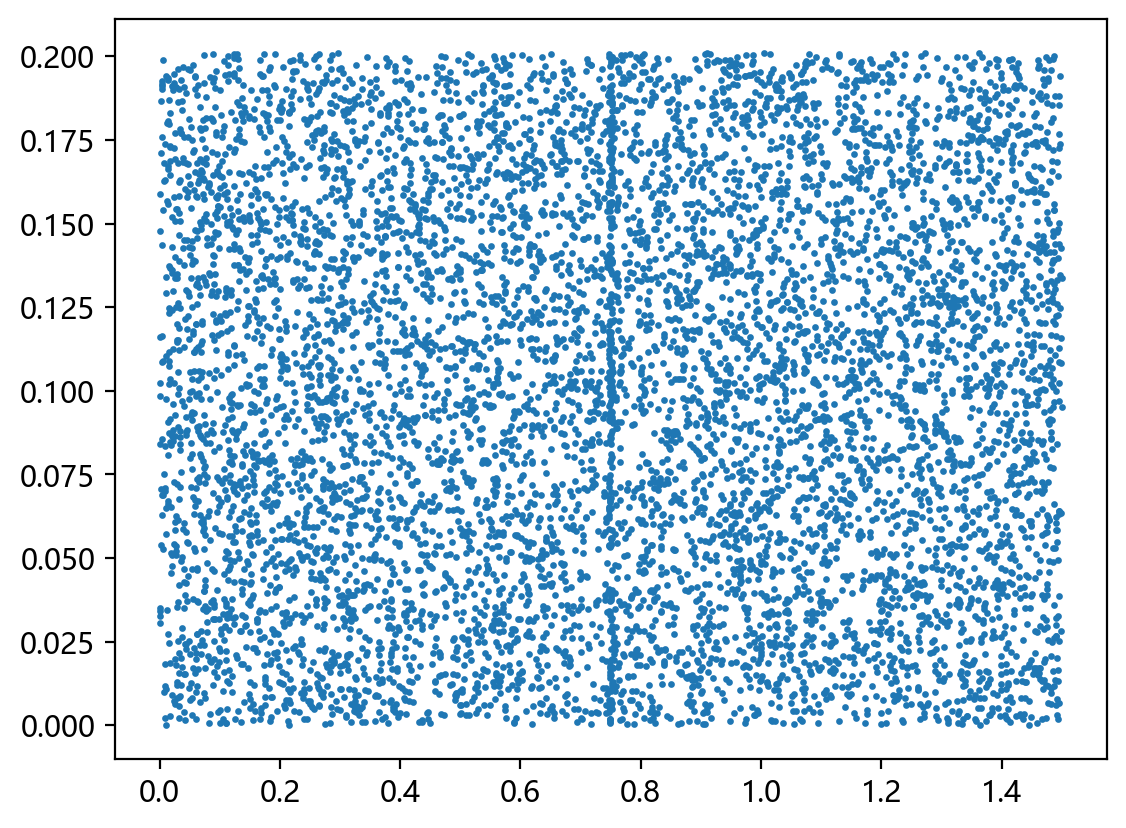

In [13]:
K = 4
np.random.seed(K)
tf.set_random_seed(K)
anchors_x = np.vstack((np.random.uniform(0,L,8000),np.random.uniform(0,T+0.001,8000))).T
anchors_x0 = np.vstack((np.random.uniform(L/2-L_dis/2,L/2+L_dis/2,200),np.random.uniform(0,T+0.001,200))).T
anchors_x1 = np.vstack((np.linspace(L/2-L_dis/2,L/2-L_dis/2,800),np.random.uniform(0,T+0.001,800))).T
anchors_x2 = np.vstack((np.linspace(L/2+L_dis/2,L/2+L_dis/2,800),np.random.uniform(0,T+0.001,800))).T
anchors_x3 = np.vstack((np.linspace(0,0,800),np.random.uniform(0,T+0.001,800))).T
anchors_x4 = np.vstack((np.linspace(L,L,800),np.random.uniform(0,T+0.001,800))).T

anchors_x = np.vstack((anchors_x,anchors_x0))
plt.scatter(anchors_x[:,0:1],anchors_x[:,1:2],s=2)
np.savetxt('anchors_x',anchors_x)
anchors_x[0:2]

In [14]:
num_domain = 0
epochs = 10000
lr = 1e-3
u_nodenum=20
u_layer=2
E_nodenum=20
E_layer=2
activation_func1 = tf.nn.tanh
activation_func2 = tf.nn.tanh

rho = 1180
A = 0.05*0.05
EI_real = 3e9*0.05*0.05**3/12
F = -20*1.5
w0 = 5*2*np.pi

def f(x_in):
    cond1 = tf.logical_and(tf.greater_equal(x_in, L/2-L_dis/2), tf.less_equal(x_in, L/2+L_dis/2))
    f1 = F/L_dis * tf.ones_like(x_in)
    f2 = tf.zeros_like(x_in)
    f = tf.where(cond1, f1, f2)
    return f

def NP_f(x_in,t_in):
    cond1 = np.logical_and(np.greater_equal(x_in, L/2-L_dis/2), np.less(x_in, L/2+L_dis/2))
    f1 = F/L_dis*np.ones_like(x_in)*np.sin(w0*t_in)
    f2 = np.zeros_like(x_in)
    f = np.where(cond1, f1, f2)
    return f

def f_BC(x_in):
    cond1 = tf.logical_and(tf.greater(x_in, 0.05), tf.less(x_in, 1.45))
    f1 = tf.ones_like(x_in)
    f2 = tf.zeros_like(x_in)
    f = tf.where(cond1, f1, f2)
    return f

def f_T(t_in):
    cond1 = tf.logical_and(tf.greater(t_in, 0),tf.less(t_in, 0.01))
    f1 = tf.ones_like(t_in)
    f2 = tf.zeros_like(t_in)
    f = tf.where(cond1, f1, f2)
    return f

def f_sig0(x_in,i):
    cond1 = tf.logical_and(tf.greater_equal(x_in, SS[i]), tf.less_equal(x_in, SS[i+1]))
    f1 = tf.ones_like(x_in)
    f2 = tf.zeros_like(x_in)
    f = tf.where(cond1, f1, f2)
    return f

def f_sig_mid(x_in,i):
    cond1 = tf.logical_and(tf.greater_equal(x_in, SS_mid[i]), tf.less(x_in, SS_mid[i+1]))
    f1 = tf.ones_like(x_in)
    f2 = tf.zeros_like(x_in)
    f = tf.where(cond1, f1, f2)
    return f

def TF_EI(x_in):
    f1 = EI_real*(x_in+1)/2
    return f1
def NP_EI(x_in):
    f1 = (0.75+(x_in/L-0.5)**2)
    return f1

def beampde2(x, y):
    x_in = x[:,0:1]
    t_in = x[:,1:2]
    u     = y[:,0:2]
    Fai   = y[:,2:4]
    Dfai  = y[:,1+num_NN*1:1+num_NN*2]
    M     = y[:,1+num_NN*2:1+num_NN*3]
    V     = y[:,1+num_NN*3:1+num_NN*4]
    Dy_t  = y[:,1+num_NN*4:2+num_NN*4]
    EI    = y[:,2+num_NN*4:3+num_NN*4]
    Fai_dNN = []
    Dfai_dNN = []
    M_dNN = []
    V_dNN = []
    V2_dNN = []
    Q_dNN = []
    Dy_t_dNN = []
    Dy_tt_dNN = []
    
    fai_dNN = -dde.grad.jacobian(u, x, i = 0, j=0) * f_sig_mid(x_in,0) -dde.grad.jacobian(u, x, i = 1, j=0) * f_sig_mid(x_in,1)
    dfai_dNN = dde.grad.jacobian(Fai, x, i = 0, j=0) * f_sig_mid(x_in,0) + dde.grad.jacobian(Fai, x, i = 1, j=0) * f_sig_mid(x_in,1)
    dy_t_dNN = dde.grad.jacobian(u,x, i = 0, j = 1) * f_sig_mid(x_in,0) + dde.grad.jacobian(u,x, i = 1, j = 1) * f_sig_mid(x_in,1)
    dy_tt_dNN = dde.grad.hessian(u,x,component=0, i = 1, j = 1) * f_sig_mid(x_in,0)\
                + dde.grad.hessian(u,x,component=1, i = 1, j = 1)* f_sig_mid(x_in,1)
    for i in range(num_NN):
        m_dNN = EI * Dfai[:,i:i+1]
        v_dNN = dde.grad.jacobian(M, x, i = i, j=0)
        q_dNN = -dde.grad.jacobian(V, x, i = i, j=0)
        M_dNN.append(m_dNN)
        V_dNN.append(v_dNN)
        Q_dNN.append(q_dNN)
        Dy_t_dNN.append(dy_t_dNN)
        Dy_tt_dNN.append(dy_tt_dNN)
    loss_Fai = 0
    loss_Dfai = 0
    loss_M = 0
    loss_V = 0
    loss_Q = 0
    loss_EI = 0
    loss_Dy_t = 0
    loss_Dy_tt = 0
    
    loss_Fai = (Fai[:,0:1]-fai_dNN) * f_sig_mid(x_in,0) + (Fai[:,1:2]-fai_dNN) * f_sig_mid(x_in,1)    
    for i in range(num_NN):
        if i == 1:
            f_i = F/L_dis
            W_i = 0.1
        else:
            f_i = 0
            W_i =1
        Weight_M =  tf.sign (tf.tanh(tf.nn.relu( tf.abs(M[:,i:i+1]) - 1e-4)))
        loss_Dfai = loss_Dfai + (Dfai[:,i:i+1] - dfai_dNN) * f_sig0(x_in,i)
        loss_M = loss_M + (M[:,i:i+1]-M_dNN[i]) * f_sig0(x_in,i)
        loss_V = loss_V + (V[:,i:i+1]-V_dNN[i]) * f_sig0(x_in,i)
        loss_Dy_t = loss_Dy_t + (Dy_t-Dy_t_dNN[i]) * f_sig0(x_in,i) * f_T(t_in)
        loss_Q = loss_Q + ( rho*A*Dy_tt_dNN[i]/EI_real + Q_dNN[i] -f_i*tf.sin(w0*t_in)/EI_real ) * f_sig0(x_in,i)
    return [10*loss_Fai,
            loss_Dfai,
            loss_M,
            loss_V,
            loss_Dy_t,
            loss_Q]


def Boun_func1(x,y):
    dfai = dde.grad.jacobian(y,x, i =num_NN*1 , j= 0)
    return dfai
def Boun_func2(x,y):
    dfai = dde.grad.jacobian(y,x, i =num_NN*2 -1, j= 0)
    return dfai

geom = dde.geometry.Interval(0, L)
timedomain = dde.geometry.TimeDomain(0, T)
geomtime = dde.geometry.GeometryXTime(geom, timedomain)

ic1 = dde.icbc.OperatorBC(geomtime,lambda x, y, _: dde.grad.hessian(y, x,component = 0,\
                                                                    i=1,j=1)/EI_real,lambda x, _: np.isclose(x[1], 0))
ic2 = dde.icbc.OperatorBC(geomtime,lambda x, y, _: dde.grad.hessian(y, x,component = 1,\
                                                                    i=1,j=1)/EI_real,lambda x, _: np.isclose(x[1], 0))
ic3 = dde.icbc.OperatorBC(geomtime,lambda x, y, _: dde.grad.hessian(y, x,component = 2,\
                                                                    i=1,j=1)/EI_real,lambda x, _: np.isclose(x[1], 0))

data = dde.data.TimePDE(geomtime,beampde2,[observe_u1,observe_u3],\
                        num_domain=num_domain, anchors=anchors_x)

# net = dde.maps.FNN([2] + [100]*3 +  [2+num_NN*4], "tanh", "Glorot uniform")
net = dde.maps.FNN([2] + [2], None, "Glorot uniform")

def modify_output(X, y):
    x = X[:,0:1]
    t = X[:,1:2]
    u     = y[:,0:2]
    Fai   = y[:,2:4]
    Dfai  = y[:,1+num_NN*1:1+num_NN*2]
    M     = y[:,1+num_NN*2:1+num_NN*3]
    V     = y[:,1+num_NN*3:1+num_NN*4]
    Dy_t  = y[:,1+num_NN*4:2+num_NN*4]
    
    y = c1/(c1+c2+c3)*tf.layers.dense(X, 50, tf.nn.tanh) + c2/(c1+c2+c3)*tf.layers.dense(X, 50, tf.sin)\
         + c3/(c1+c2+c3)*tf.layers.dense(X, 50, tf.nn.elu)
    for i in range(4):
        y = c1/(c1+c2+c3)*tf.layers.dense(y, 50, tf.nn.tanh) + c2/(c1+c2+c3)*tf.layers.dense(y, 50, tf.sin)\
         + c3/(c1+c2+c3)*tf.layers.dense(y, 50, tf.nn.elu)
    y = tf.layers.dense(y, num_NN*5+1, None)
    
    u     = y[:,0:2]
    Fai   = y[:,2:4]
    Dfai  = y[:,1+num_NN*1:1+num_NN*2]
    M     = y[:,1+num_NN*2:1+num_NN*3]
    V     = y[:,1+num_NN*3:1+num_NN*4]
    Dy_t  = y[:,1+num_NN*4:2+num_NN*4]
    
    Hard_BC = tf.layers.dense(t, 30, activation_func2)
    for i in range(2):
        Hard_BC = tf.layers.dense(Hard_BC, 30, activation_func2)
    Hard_BC = tf.layers.dense(Hard_BC, 8, None)
    
    EI = tf.layers.dense(x, E_nodenum, activation_func2)
    for i in range(2):
        EI = tf.layers.dense(EI, E_nodenum, activation_func2)
    EI = tf.layers.dense(EI, 1, None)
    
    final_output = tf.concat([0.01*t*(x*u[:,0:1]*(x-s_mid) + P1*Hard_BC[:,0:1]*x/s_mid),\
                              0.01*t*(u[:,1:2]*(x-L)*(x-s_mid) + P1*Hard_BC[:,0:1]*(x-L)/(s_mid-L)),\
                              0.01*t*(Fai[:,0:1]*(x-s_mid) + P2*Hard_BC[:,1:2]), \
                              0.01*t*(Fai[:,1:2]*(x-s_mid) + P2*Hard_BC[:,1:2]), \
                              0.01*t*(x*Dfai[:,0:1]*(x-s1)+P3*Hard_BC[:,2:3]*x/s1),\
                              0.01*t*(Dfai[:,1:2]*(x-s1)*(x-s2)+P3*Hard_BC[:,2:3]*(x-s2)/(s1-s2)+\
                                                                P4*Hard_BC[:,3:4]*(x-s1)/(s2-s1)),\
                              0.01*t*(Dfai[:,2:3]*(x-L)*(x-s2)+P4*Hard_BC[:,3:4]*(x-L)/(s2-L)),\
                              0.01*t*(x*M[:,0:1]*(x-s1)+P5*Hard_BC[:,4:5]*x/s1),\
                              0.01*t*(M[:,1:2]*(x-s1)*(x-s2)+P5*Hard_BC[:,4:5]*(x-s2)/(s1-s2)+P6*Hard_BC[:,5:6]*(x-s1)/(s2-s1)),\
                              0.01*t*(M[:,2:3]*(x-L)*(x-s2)+P6*Hard_BC[:,5:6]*(x-L)/(s2-L)),\
                              0.01*t*(V[:,0:1]*(x-s1)+P7*Hard_BC[:,6:7]),\
                              0.01*t*(V[:,1:2]*(x-s1)*(x-s2)+P7*Hard_BC[:,6:7]*(x-s2)/(s1-s2)+P8*Hard_BC[:,7:8]*(x-s1)/(s2-s1)),\
                              0.01*t*(V[:,2:3]*(x-s2)+P8*Hard_BC[:,7:8]),\
                              P0*t*(x*Dy_t*(x-L)),
                              tf.abs(EI)
                             ], axis=1)
    return final_output

net.apply_output_transform(modify_output)
variable = dde.callbacks.VariableValue(SS, period=200, filename="s1.dat")#200为epochs之间的间隔
variable2 = dde.callbacks.VariableValue(List_P, period=200, filename="w1.dat")#200为epochs之间的间隔
model = dde.Model(data, net)

Num_loss = 8

loss = []
Weight = np.ones(Num_loss)
Weight[-2:] = 100
for i in range(Num_loss):
    loss.append('MAE')
    # if i <13:
    #     if i%2==1:
    #         loss[i] = 'MSE'
print(loss)
#     if 1<i<6:
#         loss[i] = 'zero'
# loss[4] = 'MAE'
total_time = 0
start_time = time.time()
model.compile("adam", lr, loss_weights=list(Weight.ravel()), loss = loss)
losshistory, train_state = model.train(epochs=20000, callbacks=[variable,variable2])
end_time = time.time()
total_time = total_time + end_time - start_time
list_NN = []
list_points = []
list_reslut = []

NN = Output(XY1[:,0:2])
NN = np.array(NN).reshape(len(NN),-1).T
EI = NN[:,-1:]
norm_EI = np.linalg.norm((EI-NP_EI(X1)),ord=2) / np.linalg.norm(NP_EI(X1),ord=2)
list_NN.append(np.array(NN).reshape(len(NN),-1).T)
list_reslut.append(norm_EI)
print('Norm_EI',norm_EI)

['MAE', 'MAE', 'MAE', 'MAE', 'MAE', 'MAE', 'MAE', 'MAE']
Compiling model...
Building feed-forward neural network...
'build' took 0.164093 s



/home/pms/anaconda3/envs/tensorflow/lib/python3.9/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:116: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
/tmp/ipykernel_610918/4255359446.py:164: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y = c1/(c1+c2+c3)*tf.layers.dense(X, 50, tf.nn.tanh) + c2/(c1+c2+c3)*tf.layers.dense(X, 50, tf.sin)\
/tmp/ipykernel_610918/4255359446.py:165: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  + c3/(c1+c2+c3)*tf.layers.dense(X, 50, tf.nn.elu)
/tmp/ipykernel_610918/4255359446.py:167: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  y = c1/(c1+c2+c3)*tf.layers.dense(y, 50, tf.nn.tanh) + c2/(c1+c2+c

'compile' took 24.379334 s



2025-01-08 15:09:18.942089: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2025-01-08 15:09:19.892183: I tensorflow/compiler/xla/service/service.cc:170] XLA service 0x7fe81801e7b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-01-08 15:09:19.892203: I tensorflow/compiler/xla/service/service.cc:178]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2025-01-08 15:09:19.901117: W tensorflow/stream_executor/gpu/asm_compiler.cc:230] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2025-01-08 15:09:19.901125: W tensorflow/stream_executor/gpu/asm_compiler.cc:233] Used ptxas at ptxas
2025-01-08 15:09:19.901215: I tensorflow/compiler/jit/xla_compilation_cache.cc:478] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Training model...



2025-01-08 15:09:25.160393: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:263] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-08 15:09:26.507284: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-01-08 15:09:26.509634: W tensorflow/compiler/xla/service/gpu/buffer_comparator.cc:640] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Setting XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda  or modifying $PATH can be used to set the location of ptxas
This message will only be logged once.


Step      Train loss                                                                          Test loss                                                                           Test metric
0         [5.73e-04, 3.23e-05, 1.36e-05, 1.75e-04, 7.02e-07, 5.29e-02, 9.17e-02, 7.85e-02]    [5.73e-04, 3.23e-05, 1.36e-05, 1.75e-04, 7.02e-07, 5.29e-02, 9.17e-02, 7.85e-02]    []  
1000      [2.36e-03, 2.01e-03, 2.16e-04, 2.97e-03, 2.36e-04, 6.72e-03, 4.10e-03, 3.03e-03]    [2.36e-03, 2.01e-03, 2.16e-04, 2.97e-03, 2.36e-04, 6.72e-03, 4.10e-03, 3.03e-03]    []  
2000      [1.44e-03, 6.93e-04, 4.35e-04, 2.84e-03, 8.78e-05, 4.86e-03, 2.20e-03, 1.48e-03]    [1.44e-03, 6.93e-04, 4.35e-04, 2.84e-03, 8.78e-05, 4.86e-03, 2.20e-03, 1.48e-03]    []  
3000      [9.67e-04, 3.95e-04, 3.34e-04, 2.67e-03, 3.48e-05, 3.74e-03, 1.83e-03, 1.60e-03]    [9.67e-04, 3.95e-04, 3.34e-04, 2.67e-03, 3.48e-05, 3.74e-03, 1.83e-03, 1.60e-03]    []  
4000      [5.73e-04, 2.38e-04, 2.61e-04, 2.42e-03, 2.18e-05, 2.66e-03, 1.52e-0

In [15]:
model.compile("adam", 1e-4, loss_weights=list(Weight.ravel()), loss = loss)
losshistory, train_state = model.train(epochs=20000, callbacks=[variable,variable2])
NN = Output(XY1[:,0:2])
NN = np.array(NN).reshape(len(NN),-1).T
EI = NN[:,-1:]
norm_EI = np.linalg.norm((EI-NP_EI(X1)),ord=2) / np.linalg.norm(NP_EI(X1),ord=2)
list_NN.append(np.array(NN).reshape(len(NN),-1).T)
list_reslut.append(norm_EI)
print('Norm_EI',norm_EI)

Compiling model...
'compile' took 32.199834 s



2025-01-08 15:18:02.972989: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1750] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
20000     [2.69e-04, 8.34e-05, 2.71e-05, 2.39e-04, 1.02e-05, 5.07e-04, 8.31e-04, 9.64e-04]    [2.69e-04, 8.34e-05, 2.71e-05, 2.39e-04, 1.02e-05, 5.07e-04, 8.31e-04, 9.64e-04]    []  
21000     [1.36e-04, 6.74e-05, 2.59e-05, 2.34e-04, 9.80e-06, 3.16e-04, 2.44e-04, 8.46e-05]    [1.36e-04, 6.74e-05, 2.59e-05, 2.34e-04, 9.80e-06, 3.16e-04, 2.44e-04, 8.46e-05]    []  
22000     [1.35e-04, 6.56e-05, 2.57e-05, 2.35e-04, 9.73e-06, 2.91e-04, 2.60e-04, 1.14e-04]    [1.35e-04, 6.56e-05, 2.57e-05, 2.35e-04, 9.73e-06, 2.91e-04, 2.60e-04, 1.14e-04]    []  
23000     [1.30e-04, 6.37e-05, 2.50e-05, 2.32e-04, 9.52e-06, 2.75e-04, 2.38e-04, 8.55e-05]    [1.30e-04, 6.37e-05, 2.50e-05, 2.32e-04, 9.52e-06, 2.75e-04, 2.38e-04, 8.55e-05]    []  
24000     [1.26e-04, 6.16e-05, 2.44e-05, 2.30e-04, 9.23e-06

In [16]:
for i in range(10):
    # model.compile("adam", 1e-4, loss_weights=list(Weight.ravel()), loss = loss)
    losshistory, train_state = model.train(epochs=20000, callbacks=[variable,variable2])
    NN = Output(XY1[:,0:2])
    NN = np.array(NN).reshape(len(NN),-1).T
    EI = NN[:,-1:]
    norm_EI = np.linalg.norm((EI-NP_EI(X1)),ord=2) / np.linalg.norm(NP_EI(X1),ord=2)
    list_NN.append(np.array(NN).reshape(len(NN),-1).T)
    list_reslut.append(norm_EI)
    print('Norm_EI',norm_EI)

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
40000     [1.04e-04, 4.72e-05, 1.88e-05, 1.89e-04, 7.47e-06, 2.13e-04, 2.15e-04, 1.12e-04]    [1.04e-04, 4.72e-05, 1.88e-05, 1.89e-04, 7.47e-06, 2.13e-04, 2.15e-04, 1.12e-04]    []  
41000     [9.61e-05, 4.54e-05, 1.85e-05, 1.87e-04, 7.36e-06, 2.06e-04, 2.22e-04, 1.09e-04]    [9.61e-05, 4.54e-05, 1.85e-05, 1.87e-04, 7.36e-06, 2.06e-04, 2.22e-04, 1.09e-04]    []  
42000     [1.02e-04, 4.45e-05, 1.84e-05, 1.83e-04, 7.29e-06, 2.07e-04, 2.17e-04, 1.25e-04]    [1.02e-04, 4.45e-05, 1.84e-05, 1.83e-04, 7.29e-06, 2.07e-04, 2.17e-04, 1.25e-04]    []  
43000     [9.33e-05, 4.42e-05, 1.81e-05, 1.82e-04, 7.15e-06, 2.01e-04, 1.69e-04, 4.84e-05]    [9.33e-05, 4.42e-05, 1.81e-05, 1.82e-04, 7.15e-06, 2.01e-04, 1.69e-04, 4.84e-05]    []  
44000     [9.17e-05, 4.37e-05, 1.78e-05, 1.81e-04, 7.14e-06

In [17]:
for i in range(13):
    # model.compile("adam", 1e-4, loss_weights=list(Weight.ravel()), loss = loss)
    losshistory, train_state = model.train(epochs=20000, callbacks=[variable,variable2])
    NN = Output(XY1[:,0:2])
    NN = np.array(NN).reshape(len(NN),-1).T
    EI = NN[:,-1:]
    norm_EI = np.linalg.norm((EI-NP_EI(X1)),ord=2) / np.linalg.norm(NP_EI(X1),ord=2)
    list_NN.append(np.array(NN).reshape(len(NN),-1).T)
    list_reslut.append(norm_EI)
    print('Norm_EI',norm_EI)

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
240000    [4.07e-05, 1.73e-05, 8.81e-06, 9.55e-05, 2.26e-06, 8.34e-05, 1.12e-04, 1.02e-04]    [4.07e-05, 1.73e-05, 8.81e-06, 9.55e-05, 2.26e-06, 8.34e-05, 1.12e-04, 1.02e-04]    []  
241000    [4.13e-05, 1.63e-05, 8.87e-06, 9.38e-05, 1.97e-06, 7.81e-05, 1.12e-04, 1.11e-04]    [4.13e-05, 1.63e-05, 8.87e-06, 9.38e-05, 1.97e-06, 7.81e-05, 1.12e-04, 1.11e-04]    []  
242000    [3.09e-05, 1.63e-05, 8.98e-06, 9.49e-05, 1.93e-06, 7.26e-05, 9.93e-05, 7.54e-05]    [3.09e-05, 1.63e-05, 8.98e-06, 9.49e-05, 1.93e-06, 7.26e-05, 9.93e-05, 7.54e-05]    []  
243000    [3.64e-05, 1.66e-05, 8.78e-06, 9.40e-05, 2.02e-06, 7.92e-05, 1.01e-04, 8.72e-05]    [3.64e-05, 1.66e-05, 8.78e-06, 9.40e-05, 2.02e-06, 7.92e-05, 1.01e-04, 8.72e-05]    []  
244000    [3.92e-05, 1.71e-05, 8.73e-06, 9.38e-05, 2.09e-06

KeyboardInterrupt: 

In [20]:
losshistory, train_state = model.train(epochs=23106, callbacks=[variable,variable2])
NN = Output(XY1[:,0:2])
NN = np.array(NN).reshape(len(NN),-1).T
EI = NN[:,-1:]
norm_EI = np.linalg.norm((EI-NP_EI(X1)),ord=2) / np.linalg.norm(NP_EI(X1),ord=2)
list_NN.append(np.array(NN).reshape(len(NN),-1).T)
list_reslut.append(norm_EI)
print('Norm_EI',norm_EI)

Training model...

Step      Train loss                                                                          Test loss                                                                           Test metric
476894    [2.55e-05, 9.71e-06, 5.54e-06, 5.49e-05, 1.69e-06, 5.50e-05, 9.09e-05, 7.90e-05]    [2.55e-05, 9.71e-06, 5.54e-06, 5.49e-05, 1.69e-06, 5.50e-05, 9.09e-05, 7.90e-05]    []  
477000    [2.71e-05, 9.69e-06, 5.44e-06, 5.38e-05, 1.72e-06, 5.23e-05, 8.05e-05, 7.07e-05]    [2.71e-05, 9.69e-06, 5.44e-06, 5.38e-05, 1.72e-06, 5.23e-05, 8.05e-05, 7.07e-05]    []  
478000    [3.20e-05, 1.08e-05, 5.49e-06, 5.30e-05, 1.84e-06, 6.21e-05, 8.78e-05, 9.30e-05]    [3.20e-05, 1.08e-05, 5.49e-06, 5.30e-05, 1.84e-06, 6.21e-05, 8.78e-05, 9.30e-05]    []  
479000    [3.51e-05, 1.07e-05, 5.64e-06, 5.26e-05, 2.02e-06, 6.69e-05, 1.13e-04, 1.28e-04]    [3.51e-05, 1.07e-05, 5.64e-06, 5.26e-05, 2.02e-06, 6.69e-05, 1.13e-04, 1.28e-04]    []  
480000    [3.18e-05, 1.03e-05, 5.66e-06, 5.20e-05, 1.85e-06